Name : Muhammad Zohaib Aslam Khan   <br> 
## RollNO : BSCS2019-57

##Problem No. 1 Try the following code snippet in Python:<br>
 import sklearn.datasets as datasets<br>
 from matplotlib import pyplot as plt<br>
 iris=datasets.load_iris()<br>


In [186]:
import pandas as pd
import sklearn.datasets as datasets
from matplotlib import pyplot as plt
iris=datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

##***a)*	Write code to print number of rows in iris? Also, write the obtained output?**

In [187]:
iris_dataframe = pd.DataFrame(data=iris.data,columns=iris.feature_names,)
print("Numbers of rows in iris data are :",iris_dataframe.shape[0])

Numbers of rows in iris data are : 150


##***b)*	Write code to print number of columns in iris? Also, write the obtained output?**

In [188]:
print("Numbers of columns in iris data are :",iris_dataframe.shape[1])

Numbers of columns in iris data are : 4


##***c)*	Write code to plot the relationship between any two columns of your choice? Also, show the output.**
_______________________________________________________________________

In [189]:
column_1 = iris_dataframe["petal length (cm)"]
column_2 = iris_dataframe["petal width (cm)"]
corelation = column_1.corr(column_2)
print("corelation between petal length (cm) and petal width (cm) is : ",corelation)

corelation between petal length (cm) and petal width (cm) is :  0.9628654314027961


##***d)*	If we have to use single-variable regression to output “petal width”, which of the columns will serve as the best input and why?**
# Answer
we will find corelation with all columns, the column with high positive corelation will be best choice.<br>
sepal lenth : 0.8179411262715757<br>
petal length : 0.9628654314027961<br>
sepal width : -0.36612593253643927<br>
**we will use "petal length" for petal width**
__________________________________________________________________

In [190]:
slength = iris_dataframe["sepal length (cm)"]
swidth = iris_dataframe["sepal width (cm)"]
plength = iris_dataframe["petal length (cm)"]
print("sepal lenth :",slength.corr(iris_dataframe['petal width (cm)']))
print("petal length :",plength.corr(iris_dataframe['petal width (cm)']))
print("sepal width :",swidth.corr(iris_dataframe['petal width (cm)']))

print('''\nwe will use "petal length" for petal width''')

sepal lenth : 0.8179411262715757
petal length : 0.9628654314027961
sepal width : -0.36612593253643927

we will use "petal length" for petal width




---


# Problem No. 2
Download the data “hour.csv” from the LMS (uploaded with this homework). Explore the data. Brief description of the data is given below to understand the problem domain:
###
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. The current dataset contains the following attributes:
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered 
____________________________________________________________________________

##***a)*	Write code to check missing values in the data and repair them with appropriate measure.**
# Answer
No null values in data frame

In [192]:
bike_dataframe = pd.read_csv("hour.csv")
target = bike_dataframe['cnt']
bike_dataframe = bike_dataframe.loc[:,bike_dataframe.columns != "cnt"]
print("Null values are : ",bike_dataframe.isnull().sum(axis=0),"\n")

Null values are :  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
dtype: int64 



##***b)*	Write code to check and remove noise in the data.**
# Answer
1. There is no need for type casting because all data have same datatype in respective column. 
2. There are no duplicate values in data.


In [193]:
print("Duplicate values are",bike_dataframe.duplicated().sum(),"\n")
print(bike_dataframe.dtypes)

Duplicate values are 0 

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
dtype: object




---


##***c)* Write code to check whether any normalization is required. Apply appropriate normalization method where required.**
# Answer 
1. We will remove some columns beacuse they dont reaaly affect our target variable. i.e "instant" & "dteday"<br>
  __ **instant** : instant of data<br>
  __ **dteday** : date not important for us.(for PCA, normalization is important and this object canot normalize or other statics problem)






In [194]:
bike_dataframe.drop(columns = ["instant","dteday"],inplace=True)


In [195]:
#statics of data 
print(bike_dataframe.describe())

             season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357    

*** we cant normalize target column.***<br>
***After Analysing data statics,***<br>
we scaled our data by Z-score normalization.
Z-score normalization means centering the variable at zero and standardizing the variance at 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation.<br>
 <center>***New value = (x – μ) / σ***</center>
<br>
Some of columns have to be normalized because they have diffrent ranges. for example "casual" and "registered" there ranges are very difrrent from others. Others columns range lies btw 0 -> 10 (mostly lies within 5), but "casual" and "registerd" lie in (0 -> 367) and (0 -> 886) respectively.<br>
So we will normalize these columns to make values in data on common scale.Reason for this is, when we do further analysis like linear regression, for example, the attributed income will intrinsically influence the result more due to its larger value.<br>
For Normalization we will use MinMaxScaler.<br><center>
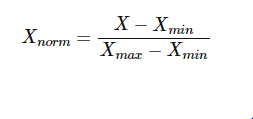</center>

In [196]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler() 
bike_dataframe_scaled = stdscaler.fit_transform(bike_dataframe)
print(bike_dataframe_scaled.mean(axis=0))
print(bike_dataframe_scaled.std(axis=0))

[-1.43915670e-16  2.68206476e-16  0.00000000e+00 -7.45642623e-17
 -4.17028362e-17  1.36760772e-16  5.23329709e-17 -2.45310801e-17
  1.56998913e-16 -1.83165398e-16 -3.07456204e-16  1.53728102e-16
  2.28956748e-17 -3.92497282e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [197]:
from sklearn.preprocessing import MinMaxScaler
minMax = MinMaxScaler() 
bike_dataframe_scaled = minMax.fit_transform(bike_dataframe_scaled)
print("mean:")
print(bike_dataframe_scaled.std(axis=0),"\n")
print("std:")
print(bike_dataframe_scaled.mean(axis=0))

mean:
[0.3689621  0.49999344 0.31260698 0.30061766 0.16716047 0.33428562
 0.46541724 0.21311283 0.19648018 0.17184527 0.19292428 0.14380711
 0.13434227 0.17082724] 

std:
[0.50054664 0.50256056 0.50343413 0.50203269 0.02877036 0.50061377
 0.68272052 0.14176113 0.4867216  0.4757751  0.62722884 0.22346022
 0.0972104  0.17357434]




---
##***d)*	Write to code to predict the output variable using linear regression. How good is your result? Plot the result. <br>**
# Answer
We will use sklearn.-


In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bike_dataframe_scaled,target,test_size=0.2)
model = LinearRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
# print(y_pred)
# print(y_test)
print("\nscore is ",model.score(x_test,y_test))


score is  1.0


In [ ]:
from matplotlib import pyplot as plt
plt.scatter(y_test,y_pred)
plt.show()

<cente>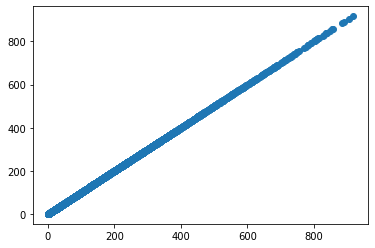</center><br>

---


##***`e)`*	Write code to reduce number of dimensions using PCA. Write to code to predict the output variable using linear regression. How good is your result? Plot the result.**

In [199]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(0.95)
print("before PCA shape is :",bike_dataframe.shape)
bike_dataframe_pca =  pca.fit_transform(bike_dataframe)# here we will use bike_dataframe(original)
print("After PCA shape is :",bike_dataframe_pca.shape)

before PCA shape is : (17379, 14)
After PCA shape is : (17379, 2)


In [200]:
x_train,x_test,y_train,y_test = train_test_split(bike_dataframe_pca,target,test_size=0.2)
model = LinearRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
# print(y_pred)
# print(y_test)
print("\nscore is ",model.score(x_test,y_test))


score is  0.9999984500627028


In [ ]:
from matplotlib import pyplot as plt
plt.scatter(y_test,y_pred)
plt.show()

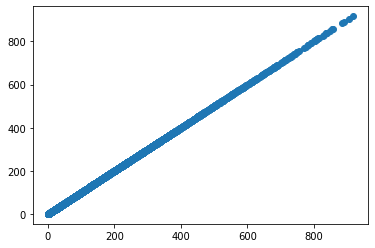


##***f)*	Comment on effectiveness of PCA in predicting the expected number bikes.**
# Answer
PCA reduce the dimensions automatically and reduce the data loss. We set the PCA(0.95) mean return 95% usefull data.<br>
As above, we had done nornmalization and remove noise and then we get very good model for this data but with using PCA we get almost very good prediction.
# <center>**The End**</center> 